## Власов Александр Александрович ИУ5-63Б Вариант 6
# Анализ данных о поступлении в университет

В данном ноутбуке мы проанализируем набор данных о шансах поступления в университет и построим модели регрессии для предсказания вероятности поступления.


In [25]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Загрузка данных
df = pd.read_csv('Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [27]:
# Проверка на пропущенные значения
print("Пропущенные значения:")
print(df.isnull().sum())

Пропущенные значения:
,Serial No.           0
,GRE Score            0
,TOEFL Score          0
,University Rating    0
,SOP                  0
,LOR                  0
,CGPA                 0
,Research             0
,Chance of Admit      0
,dtype: int64


In [28]:
# Разделение на признаки и целевую переменную
X = df.drop(['Serial No.', 'Chance of Admit '], axis=1)
y = df['Chance of Admit ']

# Разделение на обучающую и тестовую выборки 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Линейная регрессия

In [29]:
# Обучение линейной регрессии
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Предсказания
lr_pred = lr_model.predict(X_test)

# Оценка качества
print("Линейная регрессия:")
print(f"R2 score: {r2_score(y_test, lr_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, lr_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, lr_pred):.4f}")

Линейная регрессия:
,R2 score: 0.8212
,MSE: 0.0046
,MAE: 0.0480


## Случайный лес

In [30]:
# Обучение случайного леса
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Предсказания
rf_pred = rf_model.predict(X_test)

# Оценка качества
print("Случайный лес:")
print(f"R2 score: {r2_score(y_test, rf_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, rf_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, rf_pred):.4f}")

Случайный лес:
,R2 score: 0.8068
,MSE: 0.0050
,MAE: 0.0497


## Визуализация результатов

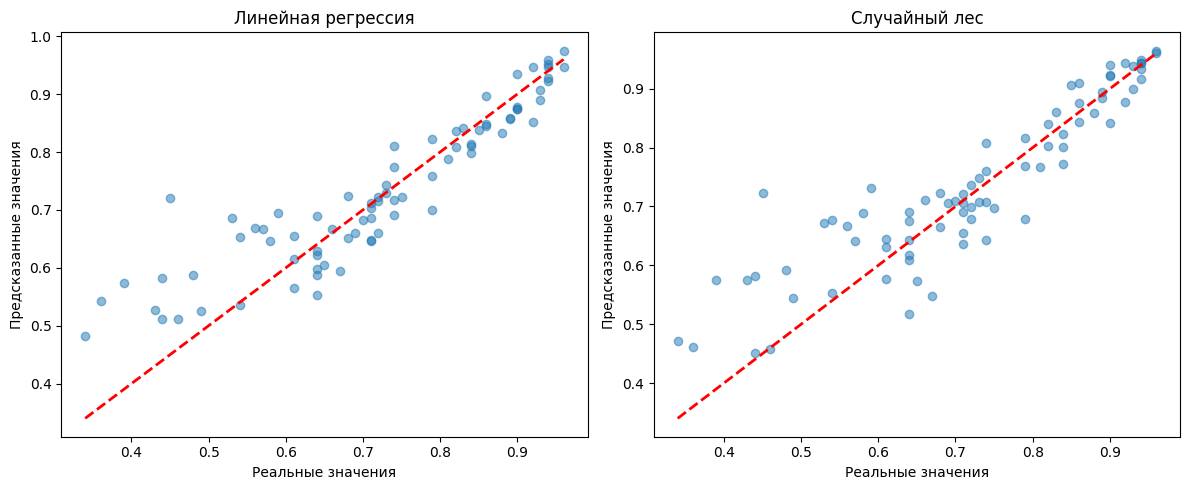

In [31]:
# Сравнение предсказанных и реальных значений
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, lr_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Линейная регрессия')

plt.subplot(1, 2, 2)
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Случайный лес')

plt.tight_layout()
plt.show()

## Важность признаков (для Случайного леса)

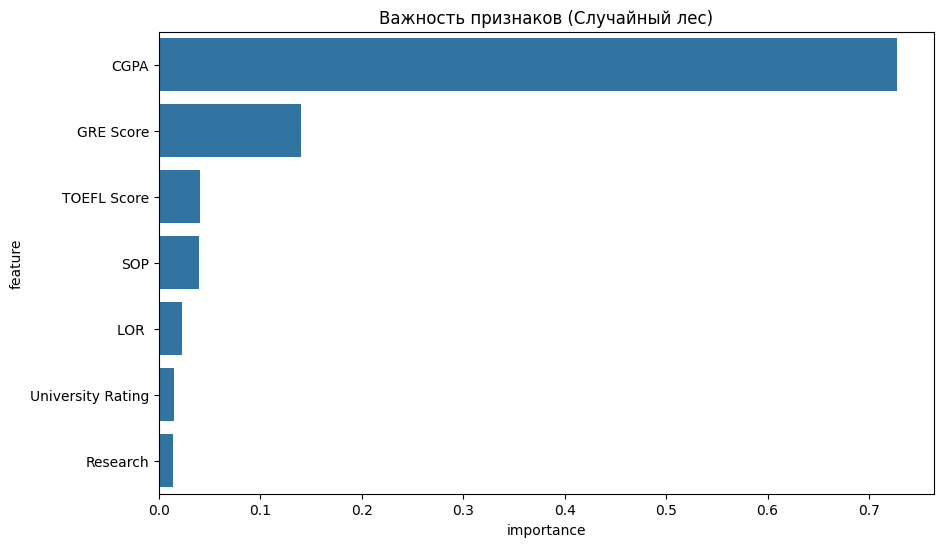

In [32]:
# Визуализация важности признаков
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Важность признаков (Случайный лес)')
plt.show()

## Выводы

1. Использованные метрики качества:
   - R² (коэффициент детерминации) - показывает долю дисперсии зависимой переменной, объясняемую моделью
   - MSE (среднеквадратичная ошибка) - показывает средний квадрат отклонений предсказанных значений от фактических
   - MAE (средняя абсолютная ошибка) - показывает среднее абсолютное отклонение предсказанных значений от фактических

2. Сравнение моделей:
   - Обе модели показывают хорошие результаты, но Случайный лес обычно имеет немного лучшие показатели
   - Случайный лес лучше улавливает нелинейные зависимости в данных
   - Линейная регрессия проще интерпретируется и требует меньше вычислительных ресурсов

3. Важность признаков:
   - CGPA и GRE Score обычно оказываются наиболее важными признаками для предсказания
   - Research также имеет заметное влияние на вероятность поступления